In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def list_subfolders(directory):
    """
    List all subfolders in the given directory.

    :param directory: The directory to list subfolders from.
    :return: A list of names of all subfolders in the directory.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all entries in the directory
    entries = os.listdir(directory)

    # Filter out the entries that are folders
    folders = [entry for entry in entries if os.path.isdir(os.path.join(directory, entry))]

    return folders


def drop_first_row(df):
    """
    Drops the first row from a pandas DataFrame.

    :param df: A pandas DataFrame.
    :return: A DataFrame with the first row dropped.
    """
    # Drop the first row
    new_df = df.iloc[1:].reset_index(drop=True)
    return new_df


def read_csv_files(directory):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        if "observations" in csv_filename: continue
        dataframes[csv_filename] = drop_first_row(pd.read_csv(full_path)).set_index("trial")

    return dataframes


def read_csv_files_nonmyopic(directory, get_observations=True):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]
    if get_observations:
        csv_files = [f for f in csv_files if "observation" in f]
    else:
        csv_files = [f for f in csv_files if "observation" not in f]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        dataframes[csv_filename] = drop_first_row(pd.read_csv(full_path)).set_index("trial")

    return dataframes

## Data Analysis for Myopic Experiments without Optimized Surrogate Per Iteration

In [8]:
dirname = "../experiments/longrun-bayesopt/myopic_bayesopt/"
# Get the relative path to each test function's data from experiments
testfn_dirnames = [f"{dirname}{subdir}" for subdir in list_subfolders(dirname)]
# Create a mapping from test function to policy used to produce GAP data
myopic_experiments = dict()
for td in testfn_dirnames:
    # Read GAP data for current test function
    csv_data = read_csv_files(td)
    # Save gaps for EI, POI, UCB
    testfn = td.split("/")[-1]
    myopic_experiments[testfn] = csv_data
    # Save averages for each policy (EI, POI, UCB)

In [9]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    ei_mean_gaps.append(gaps_df["ei_gaps"].mean())
    poi_mean_gaps.append(gaps_df["poi_gaps"].mean())
    ucb_mean_gaps.append(gaps_df["ucb_gaps"].mean())

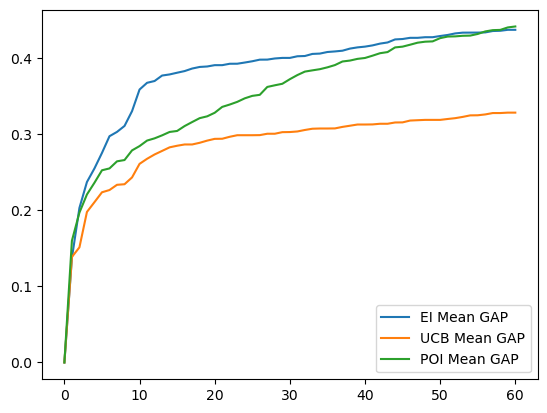

In [10]:
(sum(ei_mean_gaps) / len(ei_mean_gaps)).plot(label="EI Mean GAP")
(sum(ucb_mean_gaps) / len(ucb_mean_gaps)).plot(label="UCB Mean GAP")
(sum(poi_mean_gaps) / len(poi_mean_gaps)).plot(label="POI Mean GAP")
plt.legend()

rosenbrock dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


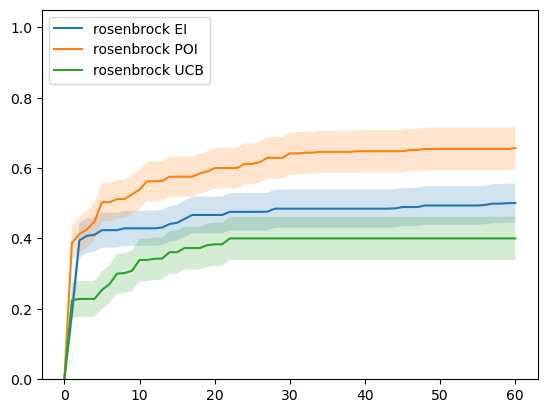

bukinn6 dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


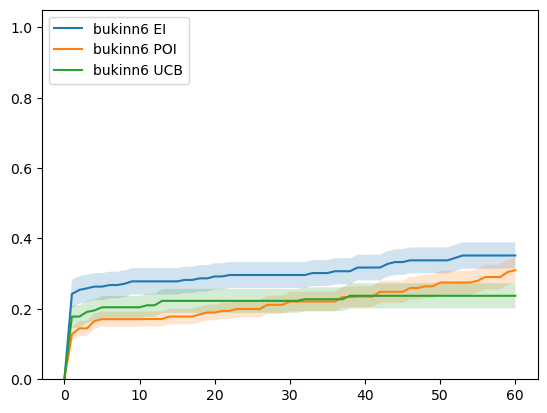

eggholder dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


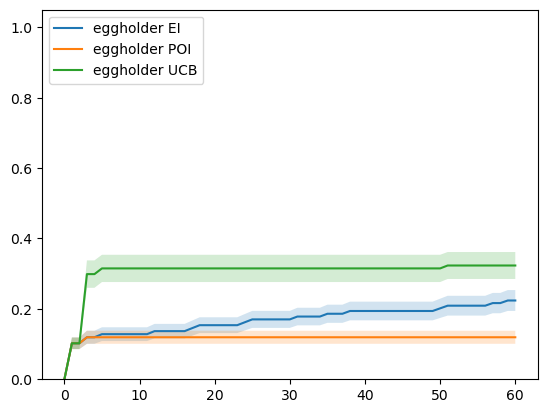

holdertable dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


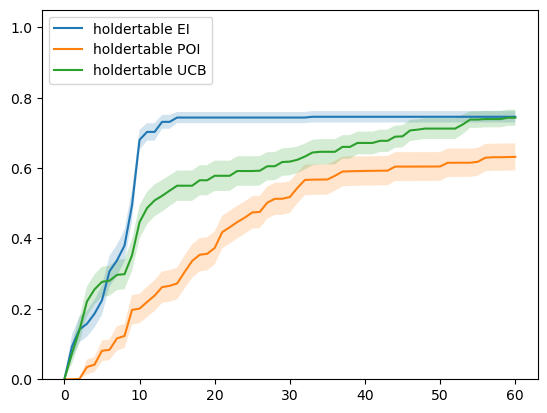

styblinskitang2d dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


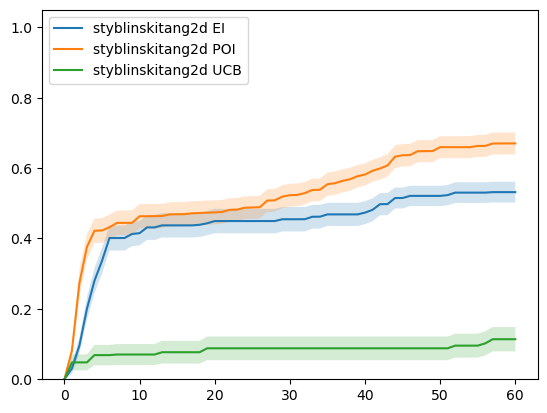

braninhoo dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


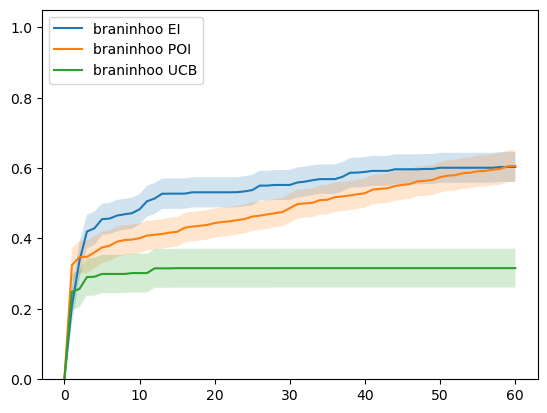

schwefel3d dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


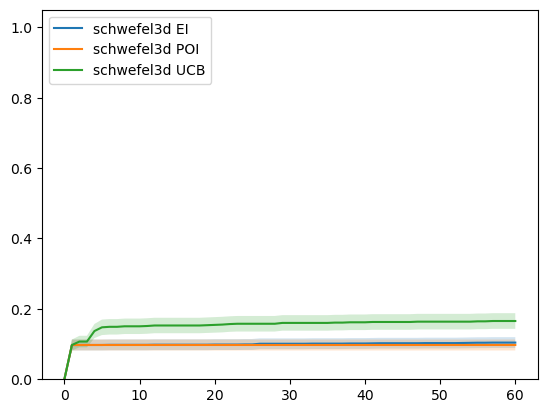

In [11]:
for testfn in myopic_experiments.keys():
    print(testfn, gaps_df.keys())
    myopic_gaps_df = myopic_experiments[testfn]
    x_values = range(len(myopic_gaps_df["ei_gaps"].mean()))
    
    gaps_mean = myopic_gaps_df["ei_gaps"].mean()
    sems = myopic_gaps_df["ei_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} EI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["poi_gaps"].mean()
    sems = myopic_gaps_df["poi_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} POI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["ucb_gaps"].mean()
    sems = myopic_gaps_df["ucb_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} UCB")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)

    plt.legend(loc="upper left")
    plt.ylim(0, 1.05)
    plt.show()

## Data Analysis for Non-Myopic Experiments without Optimized Surrogate Per Iteration

In [12]:
dirname = "../experiments/longrun-bayesopt/nonmyopic_bayesopt/"

# Get the relative path to each test function's data from experiments
testfn_dirnames = [f"{dirname}{subdir}" for subdir in list_subfolders(dirname)]

# Create a mapping from test function to policy used to produce GAP data
nonmyopic_experiments = dict()
for td in testfn_dirnames:
    print(td)
    # Read GAP data for current test function
    csv_data = read_csv_files_nonmyopic(td, get_observations=False)
    # Save gaps for horizons 0 and 1
    testfn = td.split("/")[-1]
    nonmyopic_experiments[testfn] = csv_data

../experiments/longrun-bayesopt/nonmyopic_bayesopt/rosenbrock
../experiments/longrun-bayesopt/nonmyopic_bayesopt/bukinn6
../experiments/longrun-bayesopt/nonmyopic_bayesopt/eggholder
../experiments/longrun-bayesopt/nonmyopic_bayesopt/holdertable
../experiments/longrun-bayesopt/nonmyopic_bayesopt/styblinskitang2d
../experiments/longrun-bayesopt/nonmyopic_bayesopt/braninhoo
../experiments/longrun-bayesopt/nonmyopic_bayesopt/schwefel3d


In [13]:
nonmyopic_experiments["rastrigin4d"]

KeyError: 'rastrigin4d'

### Gather Median GAP

rosenbrock


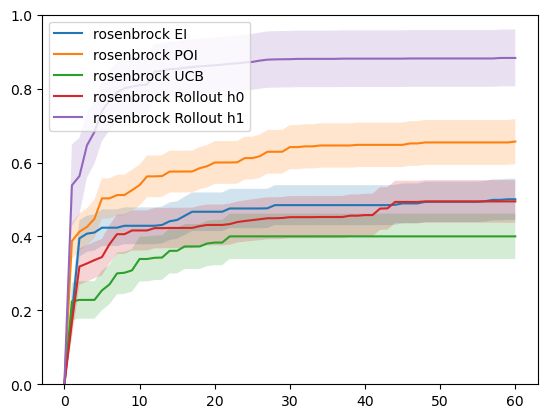

bukinn6


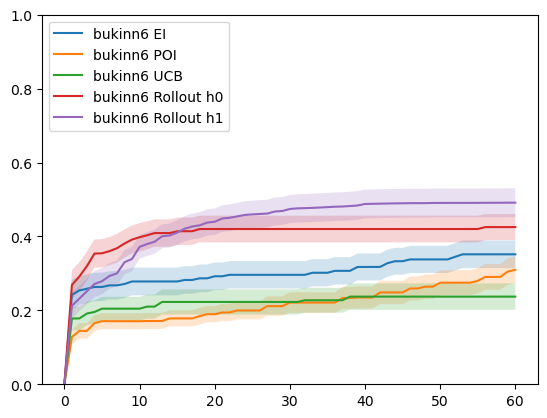

eggholder


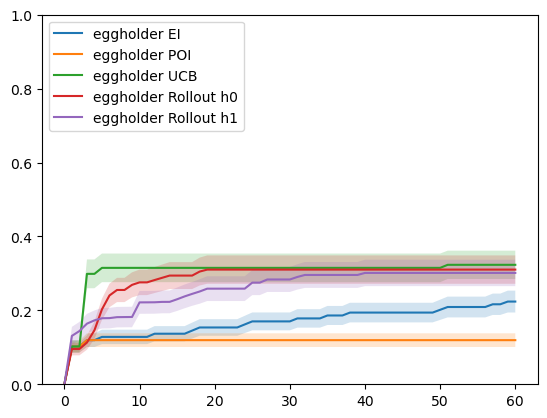

holdertable


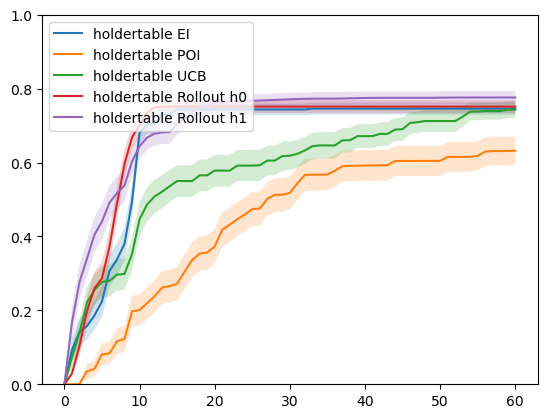

styblinskitang2d


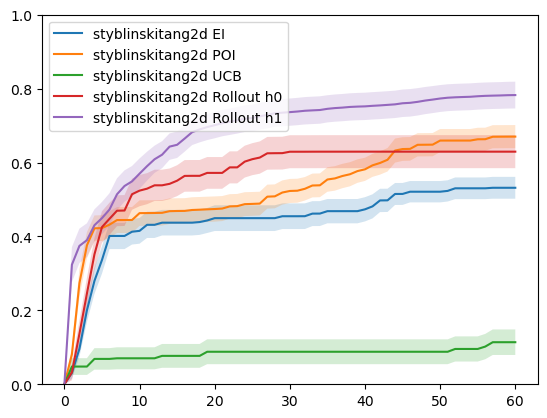

braninhoo


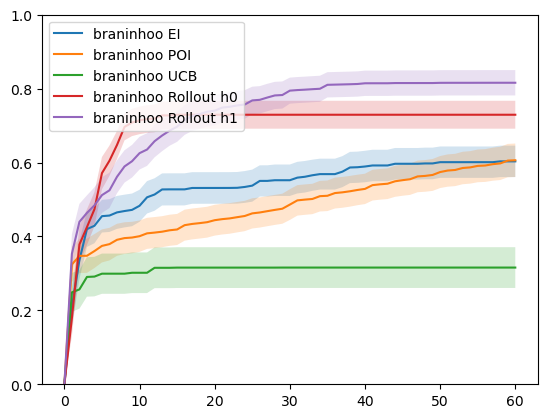

schwefel3d


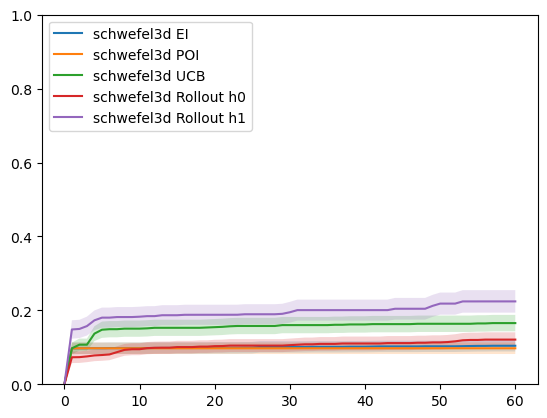

In [14]:
for testfn in nonmyopic_experiments.keys():
    print(testfn)
    myopic_gaps_df = myopic_experiments[testfn]
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    x_values = range(len(nonmyopic_gaps_df["rollout_h1_gaps"].mean()))
    
    gaps_mean = myopic_gaps_df["ei_gaps"].mean()
    sems = myopic_gaps_df["ei_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} EI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["poi_gaps"].mean()
    sems = myopic_gaps_df["poi_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} POI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["ucb_gaps"].mean()
    sems = myopic_gaps_df["ucb_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} UCB")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = nonmyopic_gaps_df["rollout_h0_gaps"].mean()
    sems = nonmyopic_gaps_df["rollout_h0_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h0")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = nonmyopic_gaps_df["rollout_h1_gaps"].mean()
    sems = nonmyopic_gaps_df["rollout_h1_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h1")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    plt.legend(loc="upper left")
    plt.ylim(0, 1)
    plt.show()

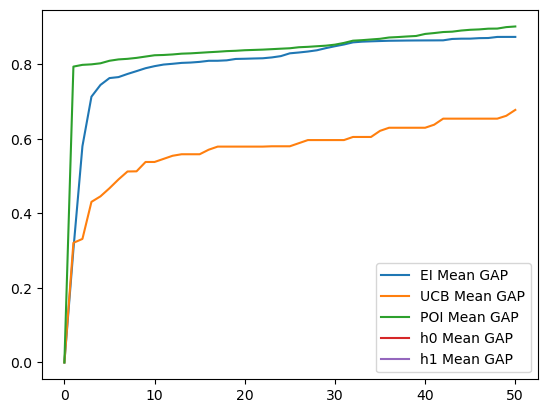

In [59]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    ei_mean_gaps.append(gaps_df["ei_gaps"].mean())
    poi_mean_gaps.append(gaps_df["poi_gaps"].mean())
    ucb_mean_gaps.append(gaps_df["ucb_gaps"].mean())

h0_mean_gaps = []
h1_mean_gaps = []

for testfn, gaps_df in nonmyopic_experiments.items():
    h0_mean_gaps.append(gaps_df["rollout_h0_gaps"].mean())
    h1_mean_gaps.append(gaps_df["rollout_h1_gaps"].mean())
    
(sum(ei_mean_gaps) / len(ei_mean_gaps)).plot(label="EI Mean GAP")
(sum(ucb_mean_gaps) / len(ucb_mean_gaps)).plot(label="UCB Mean GAP")
(sum(poi_mean_gaps) / len(poi_mean_gaps)).plot(label="POI Mean GAP")
(sum(h0_mean_gaps) / len(h0_mean_gaps)).plot(label="h0 Mean GAP")
(sum(h1_mean_gaps) / len(h1_mean_gaps)).plot(label="h1 Mean GAP")
plt.legend()

In [43]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    myopic_gaps_df = myopic_experiments[testfn]
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    means = [
        myopic_gaps_df["ei_gaps"].mean()[-1],
        myopic_gaps_df["ucb_gaps"].mean()[-1],
        myopic_gaps_df["poi_gaps"].mean()[-1],
        nonmyopic_gaps_df["rollout_h0_gaps"].mean()[-1],
        nonmyopic_gaps_df["rollout_h1_gaps"].mean()[-1]
    ]
    medians = [
        myopic_gaps_df["ei_gaps"].median()[-1],
        myopic_gaps_df["ucb_gaps"].median()[-1],
        myopic_gaps_df["poi_gaps"].median()[-1],
        nonmyopic_gaps_df["rollout_h0_gaps"].median()[-1],
        nonmyopic_gaps_df["rollout_h1_gaps"].median()[-1]
    ]
    print(f"Test Function: {testfn}")
    print(f"EI -> Mean: {means[0]:.2f} -- Median: {medians[0]:.2f}")
    print(f"UCB -> Mean: {means[1]:.2f} -- Median: {medians[1]:.2f}")
    print(f"POI -> Mean: {means[2]:.2f} -- Median: {medians[2]:.2f}")
    print(f"H0 -> Mean: {means[3]:.2f} -- Median: {medians[3]:.2f}")
    print(f"H1 -> Mean: {means[4]:.2f} -- Median: {medians[4]:.2f}\n")

# h0_mean_gaps = []
# h1_mean_gaps = []

# for testfn, gaps_df in nonmyopic_experiments.items():
#     h0_mean_gaps.append(gaps_df["rollout_h0_gaps"].mean())
#     h1_mean_gaps.append(gaps_df["rollout_h1_gaps"].mean())

Test Function: rosenbrock
EI -> Mean: 0.50 -- Median: 0.59
UCB -> Mean: 0.40 -- Median: 0.15
POI -> Mean: 0.66 -- Median: 0.92
H0 -> Mean: 0.49 -- Median: 0.58
H1 -> Mean: 0.88 -- Median: 0.99

Test Function: bukinn6
EI -> Mean: 0.35 -- Median: 0.39
UCB -> Mean: 0.24 -- Median: 0.18
POI -> Mean: 0.31 -- Median: 0.34
H0 -> Mean: 0.43 -- Median: 0.50
H1 -> Mean: 0.49 -- Median: 0.52

Test Function: eggholder
EI -> Mean: 0.22 -- Median: 0.21
UCB -> Mean: 0.32 -- Median: 0.47
POI -> Mean: 0.12 -- Median: 0.08
H0 -> Mean: 0.31 -- Median: 0.47
H1 -> Mean: 0.30 -- Median: 0.40

Test Function: holdertable
EI -> Mean: 0.75 -- Median: 0.77
UCB -> Mean: 0.74 -- Median: 0.77
POI -> Mean: 0.63 -- Median: 0.76
H0 -> Mean: 0.75 -- Median: 0.78
H1 -> Mean: 0.78 -- Median: 0.79

Test Function: styblinskitang2d
EI -> Mean: 0.53 -- Median: 0.57
UCB -> Mean: 0.11 -- Median: 0.00
POI -> Mean: 0.67 -- Median: 0.72
H0 -> Mean: 0.63 -- Median: 0.75
H1 -> Mean: 0.78 -- Median: 0.89

Test Function: braninhoo
EI

rosenbrock


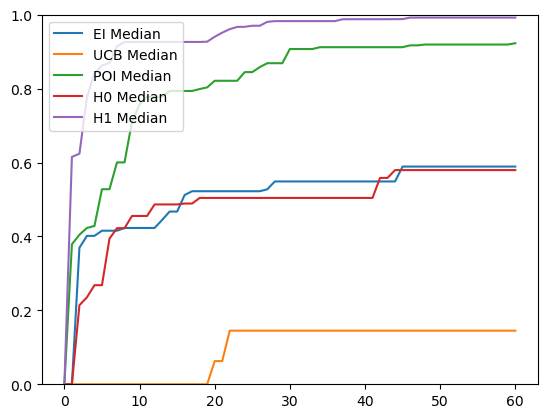

bukinn6


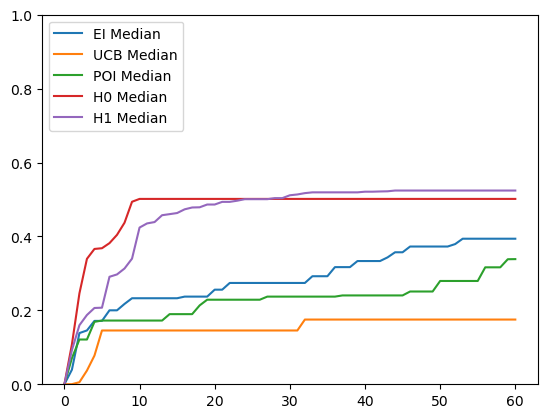

eggholder


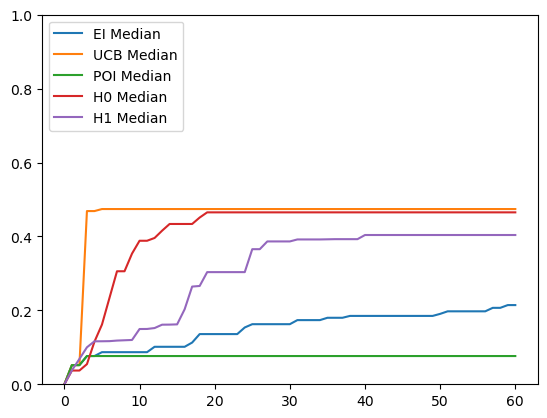

holdertable


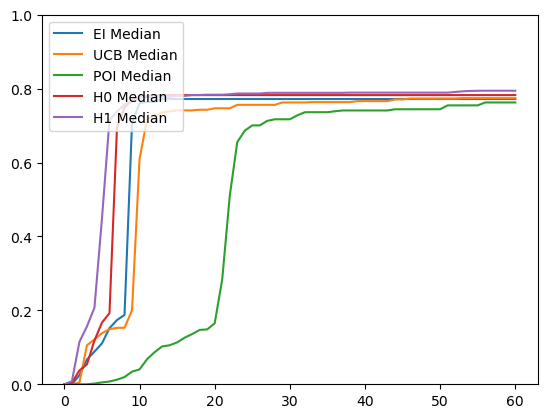

styblinskitang2d


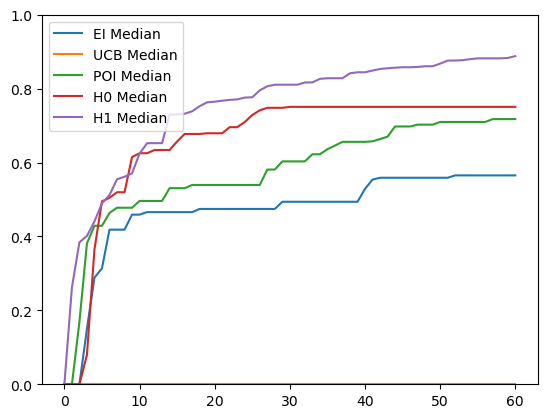

braninhoo


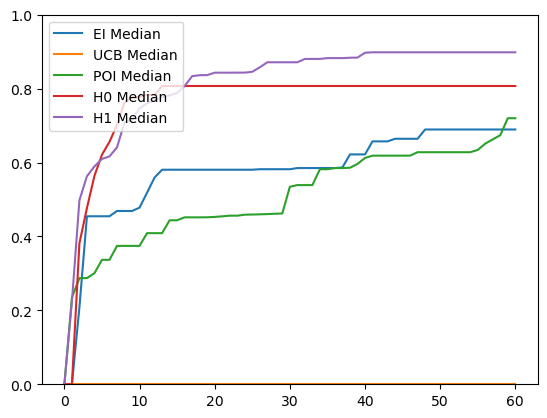

schwefel3d


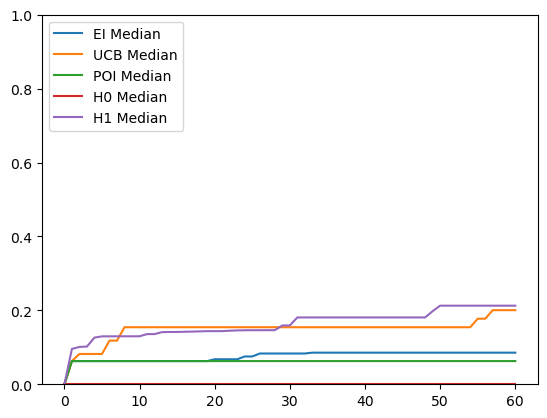

In [48]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    print(testfn)
    myopic_gaps_df = myopic_experiments[testfn]
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    medians = [
        (myopic_gaps_df["ei_gaps"].median(), "EI Median"),
        (myopic_gaps_df["ucb_gaps"].median(), "UCB Median"),
        (myopic_gaps_df["poi_gaps"].median(), "POI Median"),
        (nonmyopic_gaps_df["rollout_h0_gaps"].median(), "H0 Median"),
        (nonmyopic_gaps_df["rollout_h1_gaps"].median(), "H1 Median")
    ]
    [median.plot(label=f"{label}") for median, label in medians]
    plt.legend(loc="upper left")
    plt.ylim(0, 1)
    plt.show()